##### Measures of Descriptive statistics-Central Tendency, spread
You are given house_price.csv which contains property prices in the city of Bangalore. You need to examine price per square feet do the following:
Detect the outliers and remove it using:
1.Mean Function
2.Percentile method
3.IQR(Inter quartile range method)
4.Normal distribution
5.Zscore method
Also, plot the box plot(for all the numerical columns), histplot(to check the normality of the column(price per sqft column))
Check the correlation between all the numerical columns and plot heatmap.
Scatter plot between the variables to check the correlation between them.
For the percentile method, you can consider less than 5% and greater than 95% .

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv('house_price.csv')
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [4]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [5]:
df.price_per_sqft.describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

Above, you can see max is 12000000, which is too much price for price per sqft. Looks like this dataset has some very bad outliers so we will first 
remove those with percentile and then use z score.

Also plot histogram to see how is the data distribution.

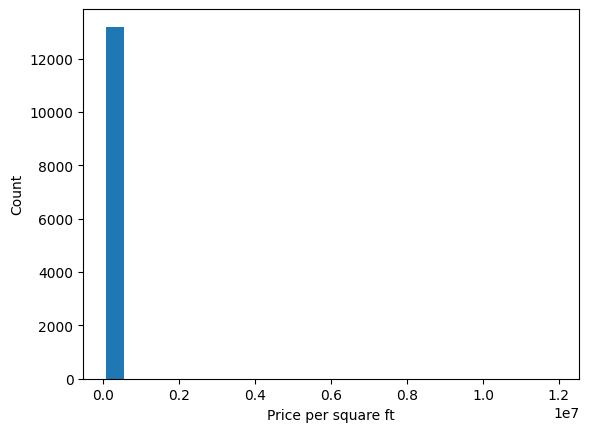

In [6]:
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

Above chart confirms our understanding that this dataset has some bad outliers. Because we see only one bar with more than 12000 data points but on the
right hand side there are data points that have higher value for price per sqft but count of these data points is very tiny compared to 12000 hence 
we can hardly see any bar

Using log scale can make visualization little better

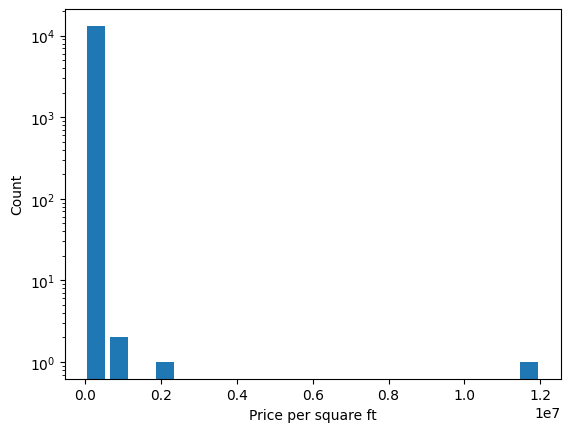

In [7]:
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

You see atleast few bars on right hand side of our highest building at least

OUTLIERS DETECTION AND REMOVAL USING MEAN FUNCTION

In [8]:
mean_price_per_sqft=df["price_per_sqft"].mean()
mean_price_per_sqft

7920.336742424242

OUTLIERS DETECTION AND REMOVAL USING PERCENTILE METHOD

In [9]:
lower_percentile=df["price_per_sqft"].quantile(0.05)
lower_percentile

3107.8500000000004

In [12]:
upper_percentile=df["price_per_sqft"].quantile(0.95)
upper_percentile

15312.099999999984

In [45]:
outliers = df[(df.price_per_sqft>upper_percentile) | (df.price_per_sqft<lower_percentile)]
outliers.sample

<bound method NDFrame.sample of                location       size  total_sqft  bath  price  bhk  \
7          Rajaji Nagar      4 BHK      3300.0   4.0  600.0    4   
9                 other  6 Bedroom      1020.0   6.0  370.0    6   
20              Kengeri      1 BHK       600.0   1.0   15.0    1   
41       Sarjapur  Road      3 BHK      1254.0   3.0   38.0    3   
45           HSR Layout  8 Bedroom       600.0   9.0  200.0    8   
...                 ...        ...         ...   ...    ...  ...   
13157             other  7 Bedroom      1400.0   7.0  218.0    7   
13185          Hulimavu      1 BHK       500.0   1.0  220.0    1   
13186             other  4 Bedroom      1200.0   5.0  325.0    4   
13191  Ramamurthy Nagar  7 Bedroom      1500.0   9.0  250.0    7   
13199      Doddathoguru      1 BHK       550.0   1.0   17.0    1   

       price_per_sqft  
7               18181  
9               36274  
20               2500  
41               3030  
45              33333  
...    

In [14]:
df2 = df[(df.price_per_sqft<upper_percentile) & (df.price_per_sqft>lower_percentile)]
df2.shape

(11880, 7)

In [15]:
df.shape

(13200, 7)

In [16]:
print("Number of outliers detected using percentile method : ",df.shape[0] - df2.shape[0])

Number of outliers detected using percentile method :  1320


OUTLIERS DETECTION AND REMOVAL USING IQR METHOD

In [17]:
q1=df["price_per_sqft"].quantile(0.25)
q1

4267.0

In [18]:
q3=df["price_per_sqft"].quantile(0.75)
q3

7317.0

In [19]:
IQR=q3-q1
IQR

3050.0

In [20]:
lower_bound=q1-1.5*IQR
lower_bound

-308.0

In [21]:
upper_bound=q3+1.5*IQR
upper_bound

11892.0

In [44]:
outliers = df[(df.price_per_sqft>upper_bound) | (df.price_per_sqft<lower_bound)]
outliers.sample

<bound method NDFrame.sample of                location       size  total_sqft  bath  price  bhk  \
7          Rajaji Nagar      4 BHK      3300.0   4.0  600.0    4   
9                 other  6 Bedroom      1020.0   6.0  370.0    6   
22          Thanisandra  4 Bedroom      2800.0   5.0  380.0    4   
45           HSR Layout  8 Bedroom       600.0   9.0  200.0    8   
48             KR Puram  2 Bedroom       800.0   1.0  130.0    2   
...                 ...        ...         ...   ...    ...  ...   
13142             other      2 BHK      1140.0   1.0  185.0    2   
13157             other  7 Bedroom      1400.0   7.0  218.0    7   
13185          Hulimavu      1 BHK       500.0   1.0  220.0    1   
13186             other  4 Bedroom      1200.0   5.0  325.0    4   
13191  Ramamurthy Nagar  7 Bedroom      1500.0   9.0  250.0    7   

       price_per_sqft  
7               18181  
9               36274  
22              13571  
45              33333  
48              16250  
...    

In [46]:
df3 = df[(df.price_per_sqft>lower_bound)&(df.price_per_sqft<upper_bound)]
df3.shape

(11935, 7)

In [31]:
df.shape

(13200, 7)

In [47]:
df.shape[0]-df3.shape[0]

1265

In [48]:
print("Number of outliers detected by IQR method : ",df.shape[0]-df3.shape[0])

Number of outliers detected by IQR method :  1265


NOW REMOVE OUTLIERS USING NORMAL DISTRIBUTION

In [33]:
mean = df.price_per_sqft.mean()
std = df.price_per_sqft.std()
print("The mean and standard deviation of the data frames are",mean,"&",std,"respectively.")

The mean and standard deviation of the data frames are 7920.336742424242 & 106727.16032810867 respectively.


In [34]:
max_limit = df.price_per_sqft.mean() + 3*df.price_per_sqft.std()
min_limit = df.price_per_sqft.mean() - 3*df.price_per_sqft.std()
max_limit, min_limit

(328101.8177267502, -312261.14424190175)

In [40]:
outliers = df[(df.price_per_sqft>max_limit) | (df.price_per_sqft<min_limit)]
outliers.sample

<bound method NDFrame.sample of              location       size  total_sqft  bath  price  bhk  price_per_sqft
345             other  3 Bedroom        11.0   3.0   74.0    3          672727
1106            other  5 Bedroom        24.0   2.0  150.0    5          625000
4044   Sarjapur  Road  4 Bedroom         1.0   4.0  120.0    4        12000000
4924            other      7 BHK         5.0   7.0  115.0    7         2300000
11447      Whitefield  4 Bedroom        60.0   4.0  218.0    4          363333>

In [41]:
df4 = df[(df.price_per_sqft>min_limit) & (df.price_per_sqft<max_limit)]
df4.shape

(13195, 7)

In [42]:
df.shape[0]-df4.shape[0]

5

In [43]:
print("Number of outliers detected using normal distribution method : ",df.shape[0] - df4.shape[0])

Number of outliers detected using normal distribution method :  5


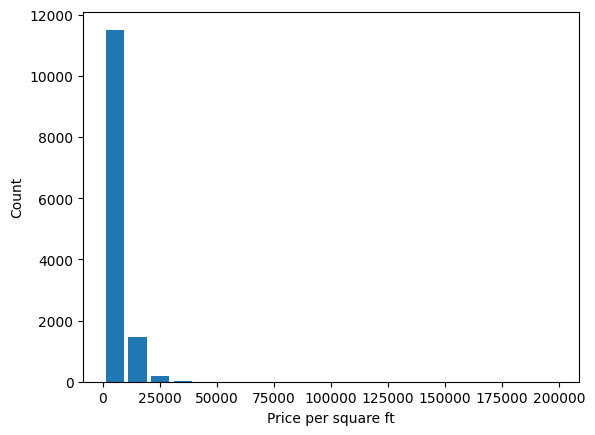

In [62]:
plt.hist(df4.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

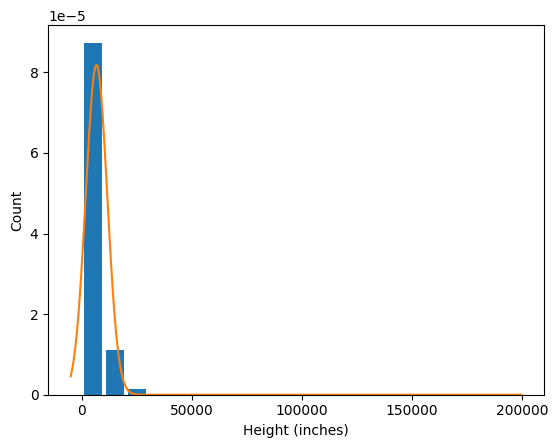

In [63]:
from scipy.stats import norm
import numpy as np

plt.hist(df4.price_per_sqft, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(-5000, df4.price_per_sqft.max(), 100)
plt.plot(rng, norm.pdf(rng,df4.price_per_sqft.mean(),df4.price_per_sqft.std()))

OUTLIERS DETECTION AND REMOVAL USING ZSCORE METHOD

In [51]:
df['zscore'] = (df.price_per_sqft-df.price_per_sqft.mean())/df.price_per_sqft.std()
df.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
4787,Bannerghatta Road,2 BHK,1220.0,2.0,80.00,2,6557,-0.012774
9427,Hormavu,2 BHK,1400.0,2.0,75.00,2,5357,-0.024018
7659,Green Glen Layout,3 BHK,1645.0,3.0,110.00,3,6686,-0.011565
13138,Whitefield,1 BHK,877.0,1.0,59.00,1,6727,-0.011181
1244,other,4 Bedroom,2150.0,4.0,80.00,4,3720,-0.039356
498,Hoodi,3 BHK,1545.0,3.0,68.75,3,4449,-0.032525
10373,other,9 Bedroom,1200.0,9.0,230.00,9,19166,0.105368
320,other,4 Bedroom,1200.0,4.0,165.00,4,13750,0.054622
9039,Mico Layout,1 BHK,800.0,1.0,29.50,1,3687,-0.039665
10704,Kothanur,2 BHK,1285.0,2.0,60.00,2,4669,-0.030464


In [53]:
outliers_z = df[(df.zscore < -3) | (df.zscore>3)]
outliers_z.shape

(5, 8)

In [54]:
outliers_z.sample(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000,112.362023
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000,5.781843
11447,Whitefield,4 Bedroom,60.0,4.0,218.0,4,363333,3.330105
345,other,3 Bedroom,11.0,3.0,74.0,3,672727,6.229030
4924,other,7 BHK,5.0,7.0,115.0,7,2300000,21.476067


In [55]:
df5 = df[(df.zscore>-3)&(df.zscore<3)]
df5.shape

(13195, 8)

In [56]:
df.shape[0] - df5.shape[0]

5

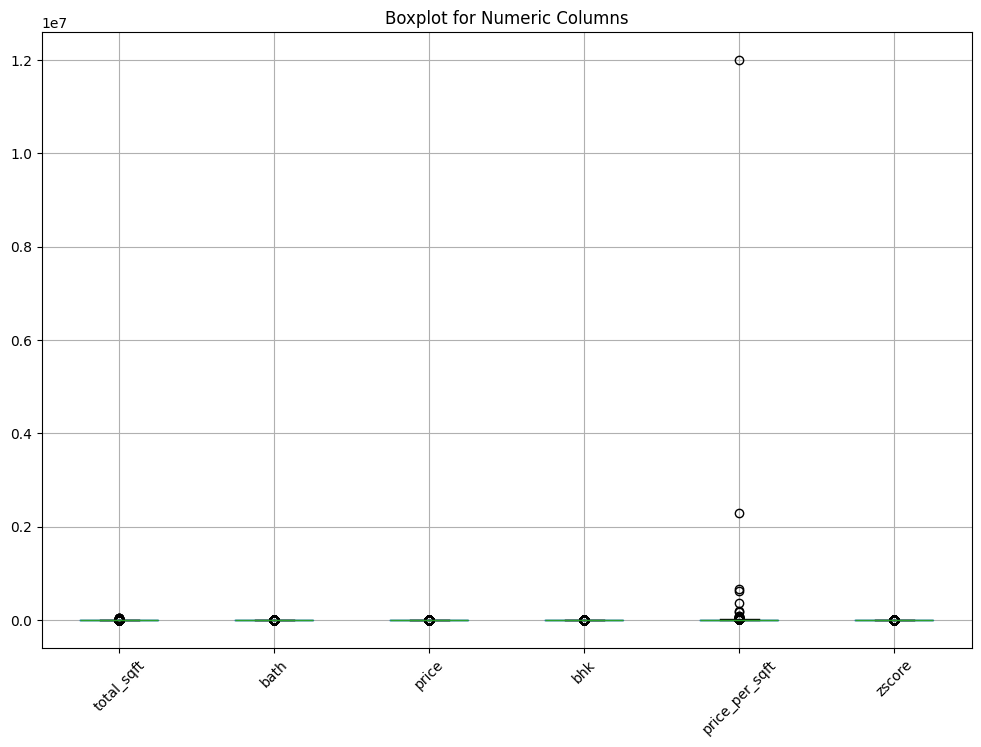

In [59]:
df.boxplot(figsize=(12, 8))
plt.title('Boxplot for Numeric Columns')
plt.xticks(rotation=45)
plt.show()

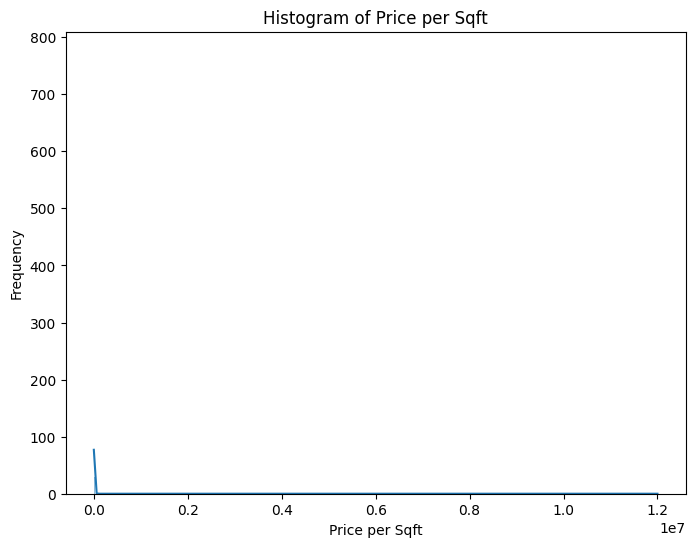

In [60]:
plt.figure(figsize=(8, 6))
sns.histplot(df['price_per_sqft'], kde=True)
plt.title('Histogram of Price per Sqft')
plt.xlabel('Price per Sqft')
plt.ylabel('Frequency')
plt.show()

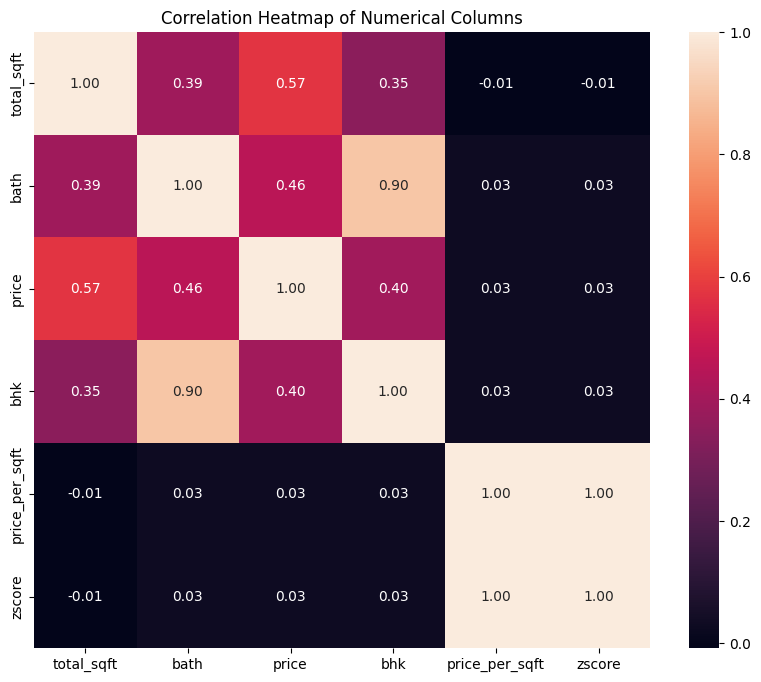

In [61]:
numeric_columns = df.select_dtypes(include=['number'])

correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True,fmt=".2f", square=True)
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

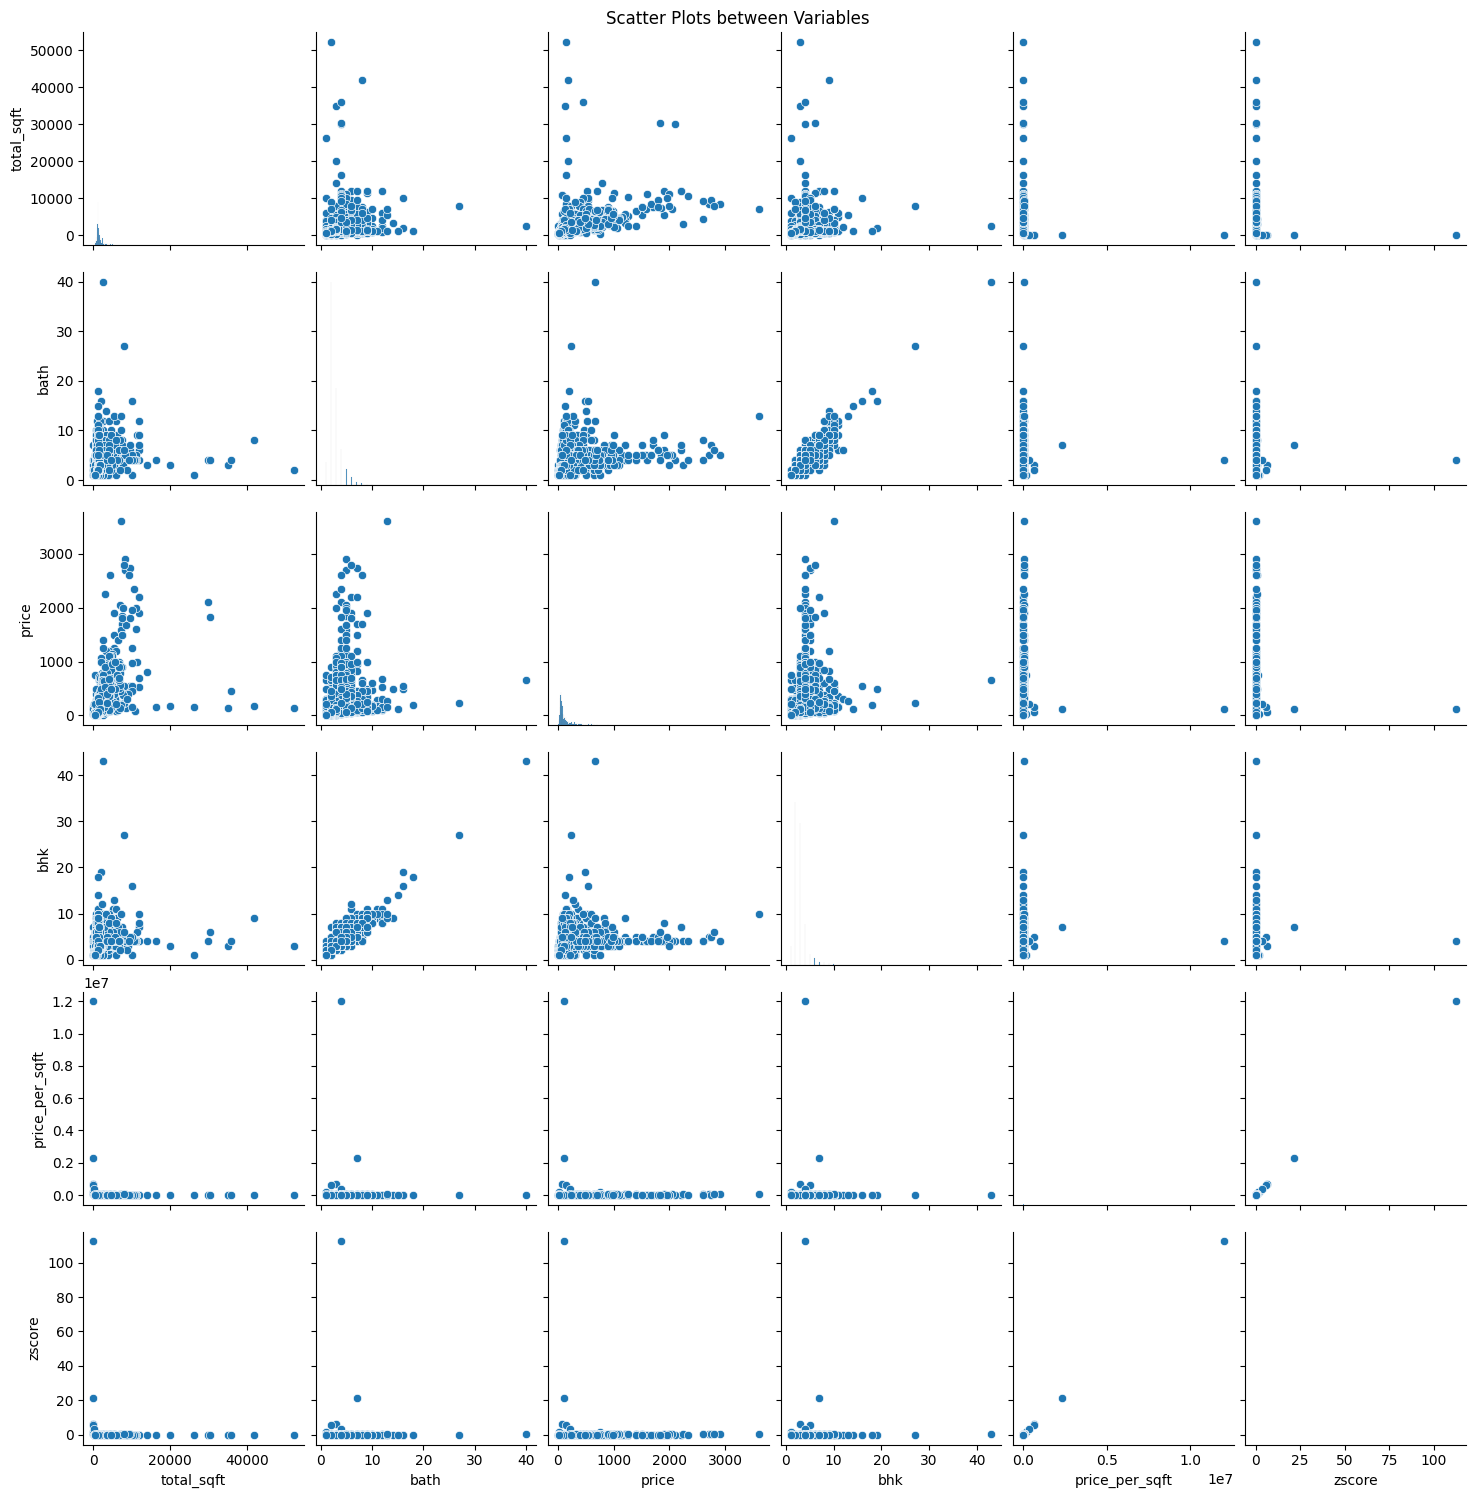

In [57]:
sns.pairplot(df)
plt.suptitle('Scatter Plots between Variables',y=1)
plt.show()